<a href="https://colab.research.google.com/github/Mfths/2025_PBO_IFA/blob/main/JOB_2_Visi_Komputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum D1 Memulai Klasifikasi Gambar dengan Dataset Sederhana

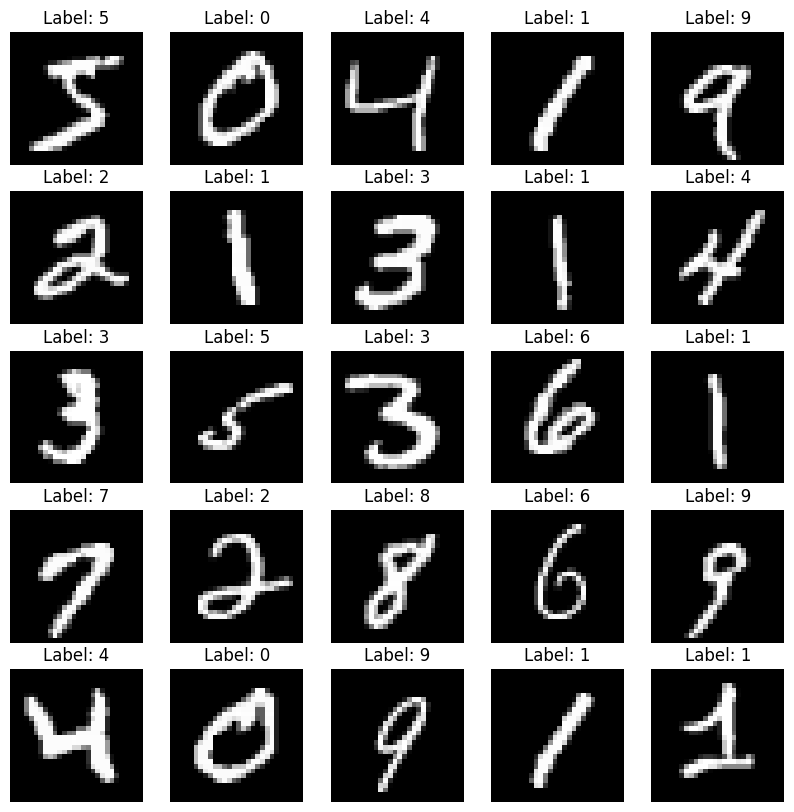

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


Praktikum D3 – Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.8996 - loss: 0.3520 - val_accuracy: 0.9803 - val_loss: 0.0701
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9809 - loss: 0.0656 - val_accuracy: 0.9845 - val_loss: 0.0558
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9870 - loss: 0.0415 - val_accuracy: 0.9872 - val_loss: 0.0503
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9914 - loss: 0.0284 - val_accuracy: 0.9862 - val_loss: 0.0510
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9943 - loss: 0.0196 - val_accuracy: 0.9878 - val_loss: 0.0501


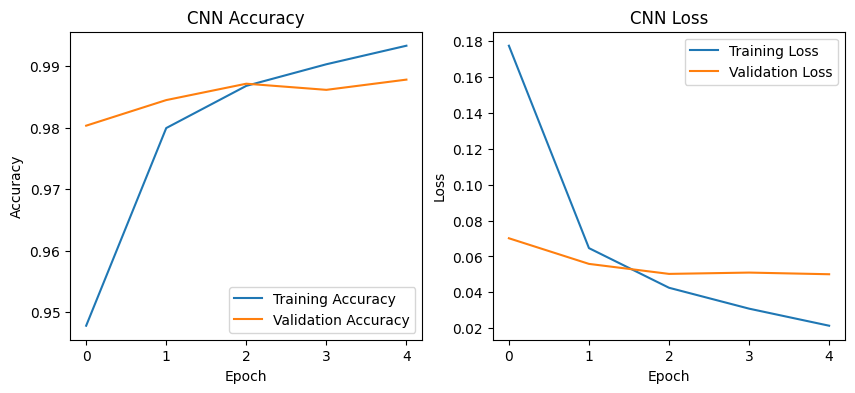

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Sesudah di double Conv2D

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.8877 - loss: 0.3850 - val_accuracy: 0.9813 - val_loss: 0.0622
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9827 - loss: 0.0604 - val_accuracy: 0.9883 - val_loss: 0.0390
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9879 - loss: 0.0370 - val_accuracy: 0.9868 - val_loss: 0.0520
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9898 - val_loss: 0.0366
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0.9885 - val_loss: 0.0396


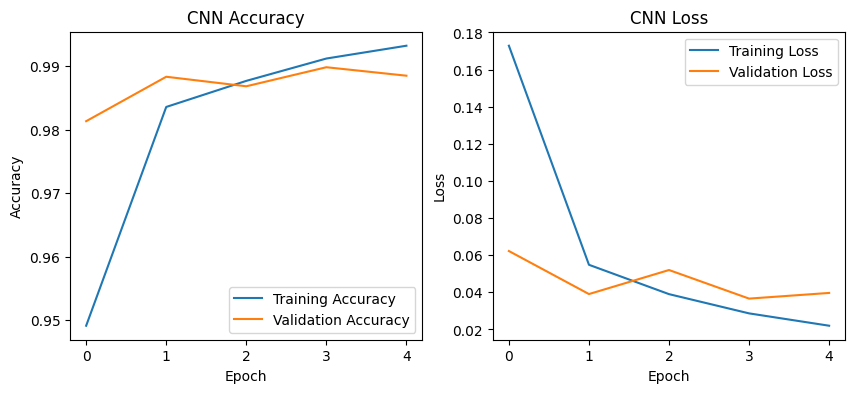

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 45ms/step - accuracy: 0.3635 - loss: 1.7288 - val_accuracy: 0.5416 - val_loss: 1.2881
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.5808 - loss: 1.1787 - val_accuracy: 0.6438 - val_loss: 1.0324
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6451 - loss: 1.0165 - val_accuracy: 0.6442 - val_loss: 0.9979
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.6790 - loss: 0.9184 - val_accuracy: 0.6738 - val_loss: 0.9676
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.7053 - loss: 0.8523 - val_accuracy: 0.6844 - val_loss: 0.9072
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.7294 - loss: 0.7836 - val_accuracy: 0.6960 - val_loss: 0.8984
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.7449 - loss: 0.7341 - val_accuracy: 0.7034 - val_loss: 0.8886
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.7578 -

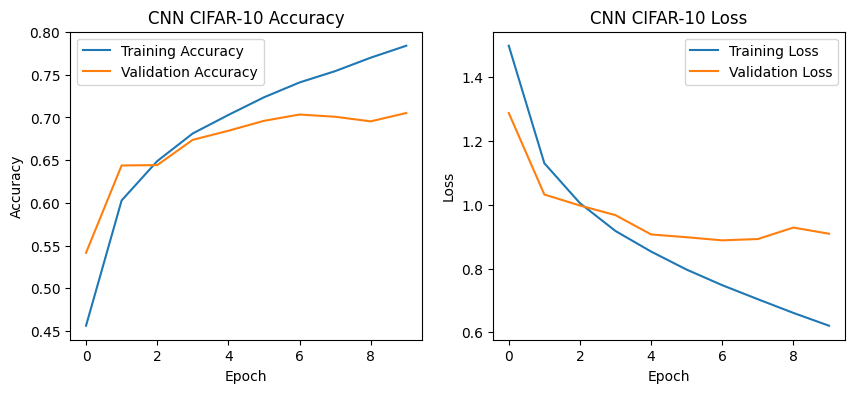

In [26]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Setelah ditambahkan Dropout(0.5)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step - accuracy: 0.2873 - loss: 1.9064 - val_accuracy: 0.5150 - val_loss: 1.3563
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.4676 - loss: 1.4641 - val_accuracy: 0.5766 - val_loss: 1.1990
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.5244 - loss: 1.3320 - val_accuracy: 0.6284 - val_loss: 1.0877
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.5575 - loss: 1.2372 - val_accuracy: 0.6486 - val_loss: 1.0194
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.5795 - loss: 1.1816 - val_accuracy: 0.6526 - val_loss: 0.9987
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.6014 - loss: 1.1148 - val_accuracy: 0.6654 - val_loss: 0.9575
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.6163 - loss: 1.0851 - val_accuracy: 0.6800 - val_loss: 0.9248
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6260 -

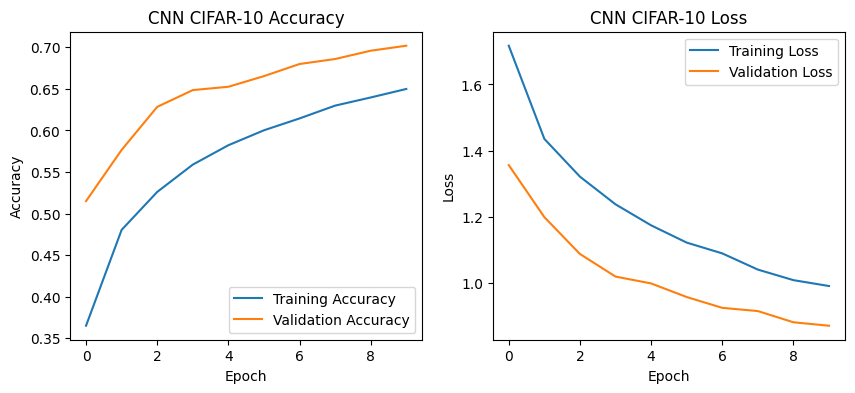

In [30]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dropout(0.5),
layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum D5 – Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 731s 517ms/step - accuracy: 0.4508 - loss: 1.5589 - val_accuracy: 0.5786 - val_loss: 1.2189
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 720s 502ms/step - accuracy: 0.5805 - loss: 1.2053 - val_accuracy: 0.5872 - val_loss: 1.1673
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 750s 508ms/step - accuracy: 0.5992 - loss: 1.1455 - val_accuracy: 0.5984 - val_loss: 1.1520
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 703s 500ms/step - accuracy: 0.6186 - loss: 1.0947 - val_accuracy: 0.6072 - val_loss: 1.1245
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 701s 498ms/step - accuracy: 0.6263 - loss: 1.0758 - val_accuracy: 0.6134 - val_loss: 1.1121


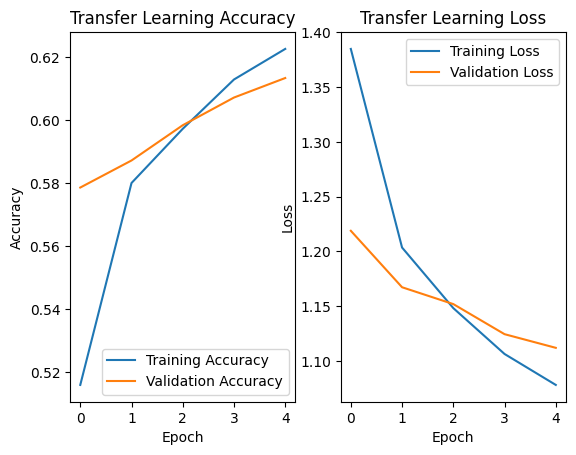

In [32]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history ===== plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Kode program setelah membuka 1-2 terahir dari  lapisan konvolusional



Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 795s 562ms/step - accuracy: 0.5094 - loss: 1.4058 - val_accuracy: 0.6268 - val_loss: 1.0682
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 786s 551ms/step - accuracy: 0.6341 - loss: 1.0450 - val_accuracy: 0.6338 - val_loss: 1.0508
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 799s 549ms/step - accuracy: 0.6570 - loss: 0.9666 - val_accuracy: 0.6646 - val_loss: 0.9603
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 789s 561ms/step - accuracy: 0.6781 - loss: 0.9149 - val_accuracy: 0.6644 - val_loss: 0.9726
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 790s 552ms/step - accuracy: 0.6929 - loss: 0.8660 - val_accuracy: 0.6390 - val_loss: 1.0401


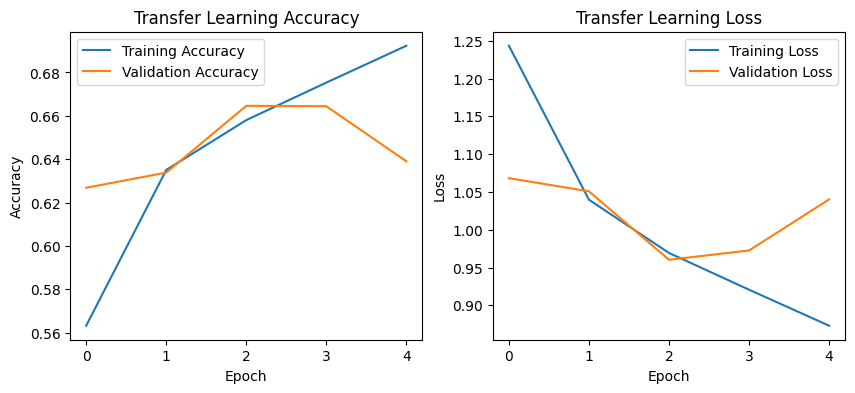

In [33]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ===== Load CIFAR-10 =====
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Untuk Normalisasi ke [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = True

# Untuk membekukan semua layer kecuali 2 terakhir
for layer in base_model.layers[:-2]:
    layer.trainable = False


model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 153s 481ms/step
              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1000
           1       0.72      0.80      0.76      1000
           2       0.40      0.77      0.52      1000
           3       0.60      0.38      0.46      1000
           4       0.62      0.35      0.45      1000
           5       0.64      0.51      0.57      1000
           6       0.57      0.80      0.66      1000
           7       0.79      0.64      0.71      1000
           8       0.75      0.80      0.77      1000
           9       0.78      0.66      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.66      0.63      0.63     10000
weighted avg       0.66      0.63      0.63     10000



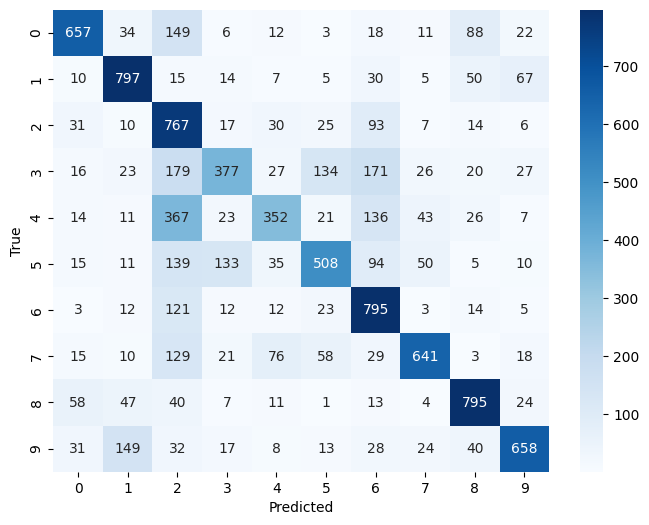

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
